In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
acci = pd.read_csv('Accidents0514.csv', dtype={'LSOA_of_Accident_Location': str})
casu = pd.read_csv('Casualties0514.csv')
vehi = pd.read_csv('Vehicles0514.csv')

**Get a general idea of the 3 datasets**

In [3]:
acci.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,1.640486e+06,1.640486e+06,1.640486e+06,1.640486e+06,1.640597e+06,1.640597e+06,1.640597e+06,1.640597e+06,1.640597e+06,1.640597e+06,...,1.640597e+06,1.640597e+06,1.640597e+06,1.640597e+06,1.640597e+06,1.640597e+06,1.640597e+06,1.640597e+06,1.640597e+06,1.640597e+06
mean,4.396051e+05,2.992476e+05,-1.436955e+00,5.258114e+01,3.082617e+01,2.838592e+00,1.831300e+00,1.351167e+00,4.117038e+00,3.540821e+02,...,3.795958e+02,9.437418e-03,7.288530e-01,1.950406e+00,1.581204e+00,1.363473e+00,1.099368e-01,7.308498e-02,1.357430e+00,1.193024e+00
std,9.550360e+04,1.614937e+05,1.404020e+00,1.454157e+00,2.554203e+01,4.017734e-01,7.152789e-01,8.260983e-01,1.924815e+00,2.593715e+02,...,1.300225e+03,1.280032e-01,1.808608e+00,1.648006e+00,1.652381e+00,6.296258e-01,7.331669e-01,6.229790e-01,4.794250e-01,4.007670e-01
min,6.495000e+04,1.029000e+04,-7.516225e+00,4.991294e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00
25%,3.754842e+05,1.781200e+05,-2.367761e+00,5.148886e+01,7.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.220000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
50%,4.403800e+05,2.666200e+05,-1.398668e+00,5.229034e+01,3.100000e+01,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.280000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,5.230200e+05,3.969900e+05,-2.216495e-01,5.346786e+01,4.600000e+01,3.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,5.320000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00
max,6.555400e+05,1.208800e+06,1.762010e+00,6.075754e+01,9.800000e+01,3.000000e+00,6.700000e+01,9.300000e+01,7.000000e+00,9.410000e+02,...,9.999000e+03,2.000000e+00,8.000000e+00,7.000000e+00,9.000000e+00,5.000000e+00,7.000000e+00,7.000000e+00,3.000000e+00,3.000000e+00


In [4]:
acci.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


In [5]:
casu.describe()

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
count,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06
mean,1.485031e+00,1.433611e+00,1.493615e+00,1.416186e+00,3.435309e+01,6.020044e+00,2.866671e+00,6.663922e-01,4.740599e-01,2.828526e-01,9.074669e-02,-6.254159e-01,7.510757e+00,9.904936e-01
std,6.671878e-01,1.404250e+00,7.062961e-01,4.946520e-01,1.885804e+01,2.406346e+00,3.692819e-01,1.959742e+00,1.660281e+00,5.933772e-01,5.674798e-01,5.526900e-01,7.170375e+00,1.031795e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+01,4.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,3.000000e+00,1.000000e+00
50%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.100000e+01,6.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,9.000000e+00,1.000000e+00
75%,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,4.600000e+01,8.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00
max,9.100000e+01,8.520000e+02,3.000000e+00,2.000000e+00,1.030000e+02,1.100000e+01,3.000000e+00,1.000000e+01,9.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,9.800000e+01,3.000000e+00


In [6]:
casu.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


In [7]:
vehi.describe()

,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
count,3.004425e+06,3.004425e+06,3.004425e+06,3.004425e+06,3.004425e+06,3.004425e+06,3.004425e+06,3.004425e+06,3.004425e+06,3.004425e+06,...,3.004425e+06,3.004425e+06,3.004425e+06,3.004425e+06,3.004425e+06,3.004425e+06,3.004425e+06,3.004425e+06,3.004425e+06,3.004425e+06
mean,1.555464e+00,9.651288e+00,3.124059e-02,1.268723e+01,1.327369e-01,2.532556e+00,2.144038e-01,3.048330e-01,3.742340e-01,5.724007e-01,...,9.891550e-01,8.714362e+00,1.399377e+00,3.432806e+01,5.849723e+00,1.411705e+03,7.518251e-01,4.840520e+00,3.559397e+00,8.822091e-01
std,7.648908e-01,8.325207e+00,3.064269e-01,6.167849e+00,9.877723e-01,3.157294e+00,7.156098e-01,1.604533e+00,1.392002e+00,2.103857e+00,...,1.872632e-01,5.994410e+00,5.963102e-01,1.943809e+01,2.927710e+00,1.692195e+03,1.154131e+00,5.329182e+00,3.734888e+00,1.114586e+00
min,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,1.000000e+00,9.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,2.000000e+00,1.000000e+00,2.200000e+01,5.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00
50%,1.000000e+00,9.000000e+00,0.000000e+00,1.700000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,6.000000e+00,1.000000e+00,3.400000e+01,6.000000e+00,1.388000e+03,1.000000e+00,4.000000e+00,3.000000e+00,1.000000e+00
75%,2.000000e+00,9.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.500000e+01,2.000000e+00,4.700000e+01,8.000000e+00,1.896000e+03,1.000000e+00,9.000000e+00,7.000000e+00,1.000000e+00
max,9.100000e+01,9.800000e+01,5.000000e+00,1.800000e+01,9.000000e+00,8.000000e+00,5.000000e+00,1.200000e+01,8.000000e+00,1.100000e+01,...,2.000000e+00,1.500000e+01,3.000000e+00,1.000000e+02,1.100000e+01,9.999900e+04,1.200000e+01,1.110000e+02,1.000000e+01,3.000000e+00


In [8]:
vehi.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,9,0,18,0,0,0,0,0,...,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,1,11,0,4,0,3,0,0,0,...,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,1,11,0,17,0,0,0,4,0,...,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,2,9,0,2,0,0,0,0,0,...,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,1,9,0,18,0,0,0,0,0,...,1,15,2,49,8,1769,1,4,2,1


**What fraction of accidents occur in urban, rural and other (na) areas?**

Percentage of accidents occur in urban areas is 64%
Percentage of accidents occur in rural areas is 36%
Percentage of accidents occur in other areas is 0%


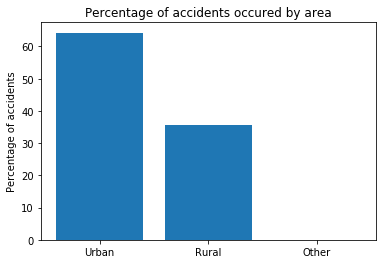

In [9]:
urban_acci = len(acci[acci['Urban_or_Rural_Area']==1])
rural_acci = len(acci[acci['Urban_or_Rural_Area']==2])
na_acci = len(acci[acci['Urban_or_Rural_Area']==3])
total_acci = urban_acci + rural_acci + na_acci

urban_pct = urban_acci / total_acci * 100
rural_pct = rural_acci / total_acci *100
na_pct = na_acci / total_acci * 100

print("Percentage of accidents occur in urban areas is {0:.0f}%".format(urban_pct))
print("Percentage of accidents occur in rural areas is {0:.0f}%".format(rural_pct))
print("Percentage of accidents occur in other areas is {0:.0f}%".format(na_pct))

x = ['Urban', 'Rural', 'Other']
y = [urban_pct, rural_pct, na_pct]
x_pos = list(range(len(x)))
plt.bar(x_pos, y)
plt.ylabel('Percentage of accidents')
plt.xticks(x_pos, x)
plt.title("Percentage of accidents occured by area")
plt.show()

**When is the most dangerous time to drive?**

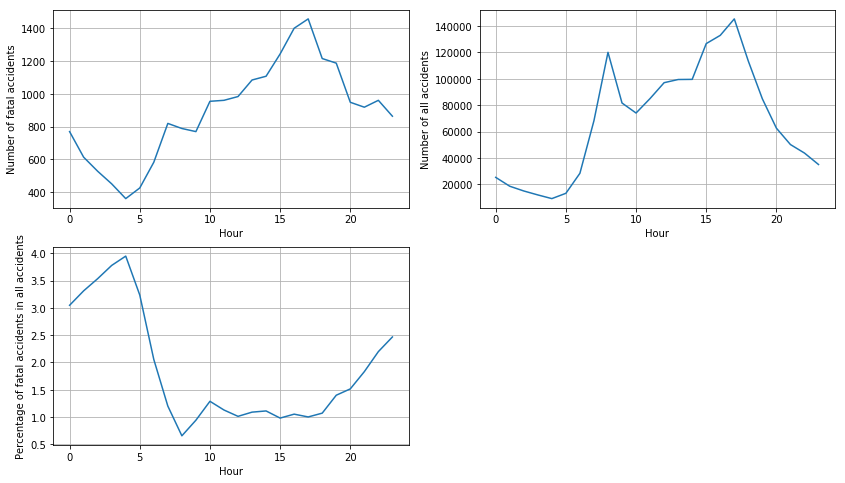

The most dangerous hour to drive, when most fatal accidents happend in all accidents, is 4 o'clock


In [10]:
acci['Hour'] = acci['Time'].map(lambda x: str(x).split(':')[0])
# print(acci['Hour'].describe())

acci['Hour'] = acci['Hour'].apply(pd.to_numeric, errors='coerce')
hour = []
num_of_fatal_acci = []
num_of_acci = []
for i in range(24):
    hour.append(i)
    num_of_fatal_acci_hour = len(acci[(acci['Accident_Severity'] == 1) & (acci['Hour'] == i)])
    num_of_acci_hour = len(acci[acci['Hour'] == i])
    num_of_fatal_acci.append(num_of_fatal_acci_hour)
    num_of_acci.append(num_of_acci_hour)
# print(hour)
# print(num_of_fatal_acci)
# print(num_of_acci)

normalized_num_of_fatal_acci = list(np.array(num_of_fatal_acci) / np.array(num_of_acci) * 100)
# print(max(normalized_num_of_fatal_acci))

fig = plt.figure(figsize=(14,8))

ax1 = fig.add_subplot(221)
ax1.plot(hour, num_of_fatal_acci)
ax1.set_ylabel('Number of fatal accidents')
ax1.set_xlabel('Hour')
ax1.grid(True)

ax2 = fig.add_subplot(222)
ax2.plot(hour, num_of_acci)
ax2.set_ylabel('Number of all accidents')
ax2.set_xlabel('Hour')
ax2.grid(True)

ax3 = fig.add_subplot(223)
ax3.plot(hour, normalized_num_of_fatal_acci)
ax3.set_ylabel('Percentage of fatal accidents in all accidents')
ax3.set_xlabel('Hour')
ax3.grid(True)

plt.show()

print("The most dangerous hour to drive, when most fatal accidents happend in all accidents, is {} o'clock".format(normalized_num_of_fatal_acci.index(max(normalized_num_of_fatal_acci))))   

**How many times more likely are accidents involving male car drivers to be fatal compared to accidents involving female car drivers?**

In [11]:
gender_fatal_car = vehi[['Accident_Index','Vehicle_Type','Sex_of_Driver']].merge(acci[['Accident_Index', 'Accident_Severity']], on = 'Accident_Index', how = 'left')
# print(gender_fatal_car.head())

m = len(gender_fatal_car[(gender_fatal_car['Vehicle_Type'] == 9) & (gender_fatal_car['Sex_of_Driver'] == 1) & (gender_fatal_car['Accident_Severity'] == 1)])
f = len(gender_fatal_car[(gender_fatal_car['Vehicle_Type'] == 9) & (gender_fatal_car['Sex_of_Driver'] == 2) & (gender_fatal_car['Accident_Severity'] == 1)])
# print(m, f)

print("Male car drivers are about {:.1f} times more likely to be involved in fatal accidents than female car drivers.".format(m/f))

Male car drivers are about 2.9 times more likely to be involved in fatal accidents than female car drivers.


**What is the trend in the number of accidents that occur each year?**

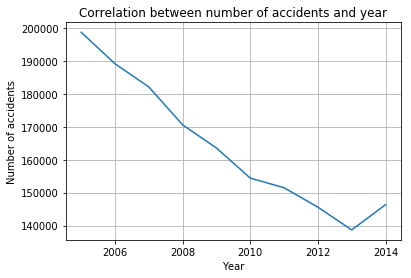

In [12]:
acci['Year'] = acci['Accident_Index'].map(lambda x: str(x)[:4])
acci['Year'] = acci['Year'].apply(pd.to_numeric, errors='coerce')
# print(acci['Year'].head())

year = []
num_of_acci_year = []
for i in range(2005, 2015):
    year.append(i)
    num_of_acci_year.append(len(acci[acci['Year'] == i]))
# print(year)
# print(num_of_acci_year)

plt.plot(year, num_of_acci_year)
plt.xlabel('Year')
plt.ylabel('Number of accidents')
plt.title('Correlation between number of accidents and year')
plt.grid(True)
plt.show()

# slope, intercept = np.polyfit(year, num_of_acci_year, 1)
# print("{:.1f}".format(slope))
# print(intercept)

**How many times more likely is one to be in an accident where you skid, jackknife, or overturn (as opposed to an accident where you don't) when it's raining or snowing compared to nice weather with no high winds?** (Accidents where the weather is unknown or missing are ignored)


In [13]:
weather_move = vehi[['Accident_Index','Skidding_and_Overturning']].merge(acci[['Accident_Index', 'Weather_Conditions']], on = 'Accident_Index', how = 'left')
# print(weather_move.head())

good_weather_acci = len(weather_move[(weather_move['Skidding_and_Overturning'].isin(range(1,6))) & (weather_move['Weather_Conditions'] == 1)])
bad_weather_acci = len(weather_move[(weather_move['Skidding_and_Overturning'].isin(range(1,6))) & (weather_move['Weather_Conditions'].isin([2,3,5,6]))])

good_weather = len(weather_move[weather_move['Weather_Conditions'] == 1])
bad_weather = len(weather_move[weather_move['Weather_Conditions'].isin([2,3,5,6])])

good_weather_freq = good_weather_acci / good_weather
bad_weather_freq = bad_weather_acci / bad_weather

# print(good_weather_acci, good_weather, good_weather_freq)
# print(bad_weather_acci, bad_weather, bad_weather_freq)
print("Skidding, jackknifing, or overturing is about {:.1f} times more likely to have an accident in raining or snowing weather than in nice weather with no high winds.".format(bad_weather_freq / good_weather_freq))

Skidding, jackknifing, or overturing is about 1.8 times more likely to have an accident in raining or snowing weather than in nice weather with no high winds.


**Do accidents in high-speed-limit areas have more casualties?**

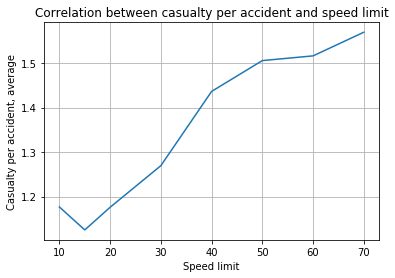

In [14]:
# print(set(acci['Speed_limit']))
speed_limit = []
num_casualty = []
num_acci = []
ratio = []

for i in sorted(list(set(acci['Speed_limit']))):
    speed_limit.append(i)
    casualty = acci.loc[acci['Speed_limit'] == i, 'Number_of_Casualties'].sum()
    num_casualty.append(casualty)
    accident = len(acci[(acci['Speed_limit'] == i)])
    num_acci.append(accident)
    r = casualty / accident
    ratio.append(r)
# print(speed_limit)
# print(num_casualty)
# print(num_acci)
# print(ratio)

plt.plot(speed_limit, ratio)
plt.xlabel('Speed limit')
plt.ylabel('Casualty per accident, average')
plt.title('Correlation between casualty per accident and speed limit')
plt.grid(True)
plt.show()

**How fast do the number of car accidents drop off with age?** (Only consider car drivers who are legally allowed to drive in the UK: 17 years or older)

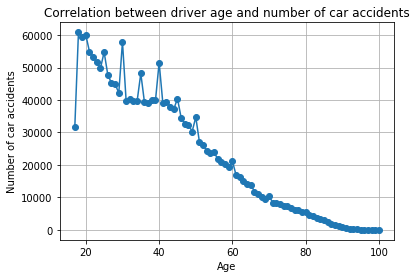

In [15]:
age_acci = vehi[['Accident_Index', 'Age_of_Driver', 'Vehicle_Type']]
# print(age_acci.head())
# print(max(age_acci['Age_of_Driver']))
age = []
num_of_acci = []
for i in range(17, max(age_acci['Age_of_Driver'])+1):
    age.append(i)
    num_of_acci.append(len(age_acci[(age_acci['Age_of_Driver'] == i) & (age_acci['Vehicle_Type'] == 9)]))
# print(age)
# print(num_of_acci)

plt.plot(age, num_of_acci, label = 'Data', marker = 'o')
plt.xlabel('Age')
plt.ylabel('Number of car accidents')
plt.title('Correlation between driver age and number of car accidents')
plt.grid(True)
plt.show()